In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Load Dataset

In [3]:
path=r'D:\DataScienceAndAICourse\PYTHON-VSCODE\Machine-Learning\project-10-Student-marks-predictor\student_info.csv'

In [4]:
df=pd.read_csv(path)
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [6]:
df.shape

(200, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [8]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


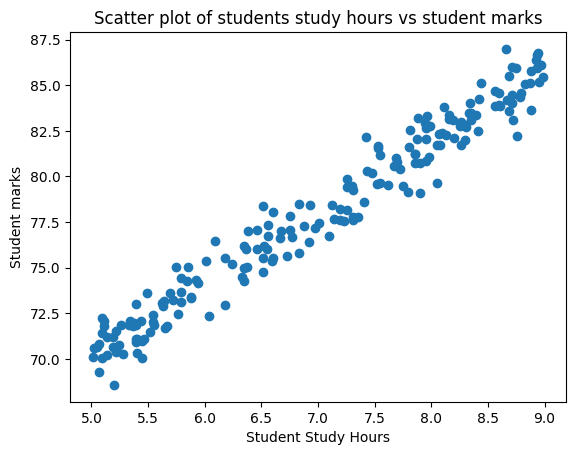

In [9]:
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel('Student Study Hours')
plt.ylabel('Student marks')
plt.title('Scatter plot of students study hours vs student marks')
plt.show()

# Prepare the data for machine learning algorithms

In [10]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [11]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [12]:
df2= df.fillna(df.mean())

In [13]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [14]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [17]:
x=df2.drop('student_marks',axis='columns')
y=df2.drop('study_hours',axis='columns')
print('Shape of X',x.shape)
print('Shape of Y',y.shape)


Shape of X (200, 1)
Shape of Y (200, 1)


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print("shape of X_train = ", x_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", x_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


In [29]:
 # y = m * x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
lr.coef_

array([[3.93037294]])

In [32]:
lr.intercept_

array([50.45063632])

In [33]:
m = 3.93
c = 50.44
y  = m * 4 + c 
y

66.16

In [34]:
lr.predict([[4]])[0][0].round(2)

C:\Users\Sushal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(66.17)

In [35]:
y_pred = lr.predict(x_test)
y_pred

array([[83.50507271],
       [70.84927186],
       [72.93236952],
       [85.35234799],
       [73.20749562],
       [84.48766595],
       [80.12495199],
       [81.85431608],
       [80.91102657],
       [82.20804964],
       [78.98514384],
       [84.84139951],
       [77.84533568],
       [77.68812077],
       [83.22994661],
       [85.78468901],
       [84.9593107 ],
       [72.61793968],
       [78.71001773],
       [79.18166248],
       [84.2911473 ],
       [85.6274741 ],
       [74.74034107],
       [81.3433676 ],
       [72.02838374],
       [80.40007809],
       [78.98514384],
       [82.09013845],
       [77.94732382],
       [82.24735337],
       [75.44780819],
       [84.60557713],
       [71.63534645],
       [75.48711192],
       [70.29901965],
       [78.98514384],
       [75.32989701],
       [84.52696967],
       [74.07217767],
       [71.4388278 ]])

In [36]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['Study_hours','Student_marks_original','Student_marks_predicted'])

,Study_hours,Student_marks_original,Student_marks_predicted
0,8.410000,82.50,83.505073
1,5.190000,71.18,70.849272
2,5.720000,73.25,72.932370
3,8.880000,83.64,85.352348
4,5.790000,73.64,73.207496
5,8.660000,86.99,84.487666
6,7.550000,81.18,80.124952
7,7.990000,82.75,81.854316
8,7.750000,79.50,80.911027
9,8.080000,81.70,82.208050


In [38]:
lr.score(x_test,y_test)

0.9521841793508594

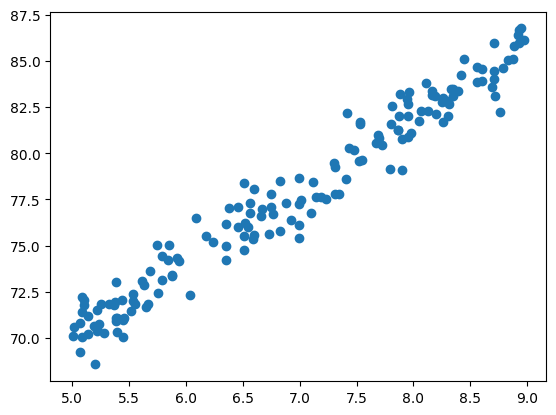

In [39]:
plt.scatter(x_train,y_train)

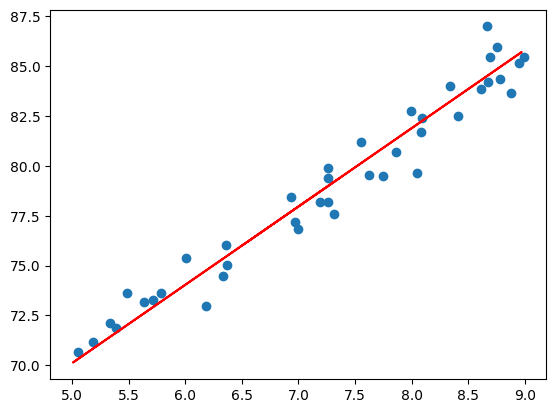

In [40]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color='r')

In [41]:
import joblib 
joblib.dump(lr,'student_mark_predictor.pkl')

['student_mark_predictor.pkl']

In [43]:
model= joblib.load('student_mark_predictor.pkl')

In [44]:
model.predict([[5]])[0][0]

C:\Users\Sushal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(70.10250100162845)